# Bases de données et création de procédés

Nous avons vu qu'une ACV consistait en deux grandes étapes : 
1. celle d'inventaire ;
2. puis celle de caractérisation d'inventaire.

En pratique, on s'appuie sur des bases de données (BDD) qui décrivent :
- la technosphère (ensemble des procédés et des flux qui les relient, dits flux intermédiaires) ; 
- la biosphère (ensemble des matières et substances potentiellement extraites ou émises par les procédés, dits flux élémentaires) ;
- les méthodes d'impacts (définition des catégories d'impact, des indicateurs, des facteurs de caractérisation associés, et accessoirement des facteurs d'agrégation et/ou de normalisation)

![schéma inventaire-impacts](Images/Hypotheses_ACV_3.png)

Commençons par les procédés. Nous utilisons couramment pour modéliser ces derniers la base de données ecoinvent qui est générique - elle recouvre plusieurs secteurs d'activités (Industrie, Énergie, Matériaux, Transports...).

Vous pouvez explorer cette BDD en ligne à ce lien : [https://ecoquery.ecoinvent.org/3.11/cutoff](https://ecoquery.ecoinvent.org/3.11/cutoff). (version, allocation, exemple de procédé)

Pour réaliser des ACV à partir de ces BDD, plusieurs logiciels sont disponibles (des libres tels OpenLCA et brightway ; des payants tels SimaPro, OneClick LCA ou Holis). Nous utilisons la librairie python brightway 2.5 dans ce qui suit car elle est open-source, permet de profiter de l'écosystème python, s'appuie explicitement sur le formalisme mathématique vu précédemment et évite l'effet "boîte noire".

**Documentation de brightway2.5**

Voir :

- documentation générale : https://docs.brightway.dev/en/latest/content/overview/index.html
- pense-bête : https://docs.brightway.dev/en/latest/content/cheatsheet/index.html

## Import des librairies et mise en place du projet

In [1]:
import bw2io as bi # ensemble des fonctions et classes pour importer et exporter (input/output)
import bw2data as bd # ... pour gérer les données du projet
import bw2calc as bc # ... pour faire des opérations
import bw2analyzer as ba # ... pour interpréter les résultats

import pandas as pd # pour utiliser un format de table pratique
import seaborn as sns # pour tracer des graphes à partir de ces tables
import matplotlib.pyplot as plt

In [2]:
bd.projects.set_current("project_ecoinvent_311") # On se met dans un projet (ie un dossier) qui contient déjà ecoinvent 3.11 cut-off

In [3]:
bd.databases # On peut vérifier les BDD disponibles dans ce projet

Databases dictionary with 3 object(s):
	betons_armes
	ecoinvent-3.11-biosphere
	ecoinvent-3.11-cutoff

## Exploration d'ecoinvent

On peut commencer par se poser les questions suivantes.

1. Combien y a-t-il d'éléments dans cette biosphère ?

In [4]:
biodb = bd.Database('ecoinvent-3.11-biosphere')
len(biodb)

9795

In [5]:
element = biodb.random() #On met dans une variable un élément de la biosphère choisi aléatoirement 
element

'Cis-chlordane' (kilogram, None, ('soil', 'agricultural'))

In [6]:
element.as_dict() # brightway permet de regarder sous forme de dictionnaire python toutes les métadonnées de l'élément

{'categories': ('soil', 'agricultural'),
 'code': '23ebfa8f-2e59-5fcd-9402-09788d39ec06',
 'CAS number': '005103-71-9',
 'synonyms': [],
 'name': 'Cis-chlordane',
 'database': 'ecoinvent-3.11-biosphere',
 'unit': 'kilogram',
 'type': 'emission',
 'id': 227399214415536498}

#### Exercice

2. Combien y a-t-il de procédés dans cette technosphère ?

Pour créer une cellule de code vous pouvez cliquer sur le symbole "+" en haut du notebook, ou bien cliquer dans la marge du document et appuyer sur la touche "b" (pour "below") ou "a" (pour "above")

##### Correction

In [7]:
eidb = bd.Database('ecoinvent-3.11-cutoff') #On sélectionne la technosphere que l'on stocke dans une variable
len(eidb) #La longueur de celle-ci correspond au nombre de procédés différents disponibles

25412

#### Suite du TD

In [15]:
activity = eidb.random()
activity

'heat and power co-generation, natural gas, 160kW electrical, lambda=1' (megajoule, Europe without Switzerland, None)

In [16]:
activity.as_dict()

{'comment': "This dataset is a copy of the Swiss dataset. \nThe multioutput-process 'natural gas, burned in cogen 160kWe lambda=1, allocation exergy' delivers the coproducts 'heat, at cogen 160kWe lambda=1, allocation exergy' and 'electricity, at cogen 160kWe lambda=1, allocation exergy'. The exergy allocation is the allocation scheme suggested to be used within ecoinvent (e.g. in electricity mixes).\n[This dataset was already contained in the ecoinvent database version 2. It was not individually updated during the transfer to ecoinvent version 3. Life Cycle Impact Assessment results may still have changed, as they are affected by changes in the supply chain, i.e. in other datasets. This dataset was generated following the ecoinvent quality guidelines for version 2. It may have been subject to central changes described in the ecoinvent version 3 change report (http://www.ecoinvent.org/database/ecoinvent-version-3/reports-of-changes/), and the results of the central updates were reviewe

3. Comment un procédé est-il relié aux autres ?

In [17]:
activity = eidb.search('anchovy') #On utilise une fonction de recherche par mot-clé, ici "anchovy"
activity # brightway retourne une liste de procédés

['landed anchovy by-catch, fresh to generic market for marine fish' (kilogram, GLO, None),
 'market for landed anchovy, fresh' (kilogram, PE, None),
 'landed anchovy to generic market for marine fish' (kilogram, GLO, None),
 'market for landed anchovy, fresh' (kilogram, RoW, None),
 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, ES, None),
 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, ES, None),
 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None),
 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None),
 'market for landed anchovy by-catch, fresh' (kilogram, GLO, None),
 'market for fish oil, from anchovy' (kilogram, GLO, None),
 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, PE, None),
 'anchovy, capture by wooden purse seiner and landing whole, fresh' (kilogram, PE, None),
 'fishmeal and fish oil production, 63-65% protein, 

In [18]:
activity = eidb.search('anchovy, capture by steel purse seiner')[0] #On choisit le premier élément de la liste, en précisant le mot-clé
activity #Ici, activity sera bien un procédé, non une liste de procédés

'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)

On regarde maintenant quels sont ses échanges avec la technosphère et la biosphère.

In [19]:
list(activity.exchanges()) #Tous les échanges

[Exchange: 1.0 kilogram 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: -1.3101560143358125e-05 kilogram 'market for antifouling paint emissions' (kilogram, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 0.7306831709485833 megajoule 'market for diesel, burned in fishing vessel' (megajoule, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 8.404560122126746e-05 kilogram 'market for lubricating oil' (kilogram, RoW, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 0.0006430474052715742 kilogram day 'market for operation, reefer, freezing' (kilogram day, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 

In [20]:
list(activity.technosphere()) #Flux intermédiaires

[Exchange: -1.3101560143358125e-05 kilogram 'market for antifouling paint emissions' (kilogram, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 0.7306831709485833 megajoule 'market for diesel, burned in fishing vessel' (megajoule, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 8.404560122126746e-05 kilogram 'market for lubricating oil' (kilogram, RoW, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 0.0006430474052715742 kilogram day 'market for operation, reefer, freezing' (kilogram day, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 0.0019373481911760598 kilogram 'market for purse seiner maintenance, steel' (kilogram, GLO, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exc

In [21]:
list(activity.biosphere()) #Flux élémentaires

[Exchange: 0.03917093148081088 kilogram 'Discarded fish, pelagic, to ocean' (kilogram, None, ('water', 'ocean')) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>,
 Exchange: 1.039887400598601 kilogram 'Fish, pelagic, in ocean' (kilogram, None, ('natural resource', 'biotic')) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>]

In [22]:
list(activity.production()) #Flux de référence (produit)

[Exchange: 1.0 kilogram 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None) to 'anchovy, capture by steel purse seiner and landing whole, fresh' (kilogram, RoW, None)>]

N'oubliez pas la page pense-bête de brightway : https://docs.brightway.dev/en/latest/content/cheatsheet/inventory.html

Pour les personnes souhaitant en savoir plus sur la structure en graphe des données dans brightway : https://docs.brightway.dev/en/latest/content/overview/inventory.html 

Bien que nous adorions la tapenade, nous allons commencer par modéliser ce que tout élève des Ponts préfère : le BÉTON ARMÉ.

## Construction de procédés béton

Il en existe dans la base de données :

In [23]:
concrete = eidb.search('concrete')
concrete

['concrete, all types to generic market for concrete, normal strength' (cubic meter, BR, None),
 'concrete, all types to generic market for concrete, medium strength' (cubic meter, CO, None),
 'concrete, all types to generic market for concrete, normal strength' (cubic meter, IN, None),
 'concrete, all types to generic market for concrete, normal strength' (cubic meter, AT, None),
 'concrete, all types to generic market for concrete, normal strength' (cubic meter, ZA, None),
 'concrete, all types to generic market for concrete, medium strength' (cubic meter, RNA, None),
 'concrete, all types to generic market for concrete, medium strength' (cubic meter, ZA, None),
 'concrete, all types to generic market for concrete, medium strength' (cubic meter, BR, None),
 'concrete, all types to generic market for concrete, normal strength' (cubic meter, RNA, None),
 'concrete, all types to generic market for concrete, normal strength' (cubic meter, CO, None),
 'concrete, all types to generic marke

Existe-t-il des procédés modélisant des bétons spécifiquement français ?

Nous utilisons une compréhension de liste conditionnelle pour préciser la recherche :

In [24]:
concrete = [a for a in eidb if 'concrete' in a['name'].lower() and a['location'] == 'FR'] # lower met la chaine de caractères en minuscules, ce qui évite la sensibilité à la casse.
concrete

[]

Comme il n'y en a pas, nous allons modéliser deux formulations avec les données dont nous disposons, pour les comparer. On en profite pour prendre en compte des armatures (on étudie du béton armé) et de l'énergie (malaxage du béton).

Considérons les formulations suivantes pour 1 m3 de béton : 

- 350kg de ciment Portland (béton A) ou CEM III/B (béton B)
- 175kg d'eau
- 800kg de sable
- 1100kg de gravier

Pour le ferraillage, prenons un ratio de 100 kg d'acier par m3 de béton. Avez-vous une remarque ?

Pour l'énergie de malaxage, prenons l'hypothèse de 14.4 MJ par m3 de béton.

Les procédés mobilisés sont les suivants :

Béton | Flux | Procédé choisi dans ecoinvent | Région | Unité | Qté pour 1m3
:---: | :---: | :---: | :---: | :---: | :---:
Béton A | ciment Portland | market for cement, Portland | Europe without Switzerland | kg | 350
Béton B | CEM III/B | market for cement, CEM III/B | Europe without Switzerland | kg | 350
Béton A & B | eau | market for tap water | Europe without Switzerland | kg | 175
Béton A & B | sable | market for sand | Rest-of-World (RoW) | kg | 800 
Béton A & B | graviers | market for gravel, crushed | Rest-of-World (RoW) | kg | 1100
Béton A & B | ferraillage | market for reinforcing steel | Global | kg | 100
Béton A & B | énergie | diesel, burned in building machine | Global | MJ | 14.4

In [25]:
from pathlib import Path
if 'betons_armes' in bd.databases : 
    print('procédés déjà importés !')
else : 
    imp = bi.ExcelImporter(Path.cwd().joinpath("betons_armes.xlsx"))
    imp.apply_strategies() #applique une série de routines sur la base de données, notamment une conversion des variables dans les bons formats
    imp.match_database(fields=('name', 'unit', 'location')) #identifie les échanges que les procédés de la base ont avec d'autres procédés de la même base
    imp.match_database('ecoinvent-3.11-cutoff', fields=('name', 'unit', 'location')) #identifie les échanges que les procédés de la base ont avec les procédés d'ecoinvent
    imp.statistics() #affiche les statistiques des "match" réalisés, notamment si certains procédés n'ont pas été trouvés ("unlinked exchanges") 
    imp.write_database() #écrit et sauvegarde la base de données

procédés déjà importés !


In [26]:
fgdb = bd.Database('betons_armes') #fgdb pour foreground database (procédés d'avant-plan vs arrière-plan)

In [27]:
beton_A = fgdb.search('Béton A')[0]
beton_A

'Béton A' (cubic meter, FR, ('custom',))

In [28]:
list(beton_A.edges()) #brightway utilise indifféremment les termes edges/exchanges et node/activity

[Exchange: 1 cubic meter 'Béton A' (cubic meter, FR, ('custom',)) to 'Béton A' (cubic meter, FR, ('custom',))>,
 Exchange: 350 kilogram 'market for cement, Portland' (kilogram, Europe without Switzerland, None) to 'Béton A' (cubic meter, FR, ('custom',))>,
 Exchange: 175 kilogram 'market for tap water' (kilogram, Europe without Switzerland, None) to 'Béton A' (cubic meter, FR, ('custom',))>,
 Exchange: 800 kilogram 'market for sand' (kilogram, RoW, None) to 'Béton A' (cubic meter, FR, ('custom',))>,
 Exchange: 1100 kilogram 'market for gravel, crushed' (kilogram, RoW, None) to 'Béton A' (cubic meter, FR, ('custom',))>,
 Exchange: 100 kilogram 'market for reinforcing steel' (kilogram, GLO, None) to 'Béton A' (cubic meter, FR, ('custom',))>,
 Exchange: 14.4 megajoule 'diesel, burned in building machine' (megajoule, GLO, None) to 'Béton A' (cubic meter, FR, ('custom',))>]

## Calcul des impacts environnementaux

Pour calculer des impacts environnementaux, il faut savoir quoi calculer, c'est-à-dire choisir une méthode d'impact. 

Remarque sur le mot méthode :
- Traditionnellement, une méthode d'impact désigne un ensemble de catégories d'impacts, chaque catégorie contenant des indicateurs environnementaux et les facteurs de caractérisation permettant de calculer ces derniers à partir des flux élémentaires (en réalité, pour chaque indicateur, à partir d'un sous-ensemble de la biosphère).
- dans brightway, une "method" désigne en fait un indicateur spécifique (calculé selon une certaine méthode d'impact), ce qui peut prêter à confusion.


Pour ce TD, nous choisissons la méthode d'impacts Environmental Footprint v3.1.

In [29]:
meth = [m for m in bd.methods if 'EF v3.1' in m[1] and 'no LT' not in m[1]] # no LT signifie no long-term, c'est à dire que les substances émises ou extraites après 100 ans ne sont pas comptées.
meth

[('ecoinvent-3.11', 'EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'climate change: biogenic',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'climate change: fossil',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'climate change: land use and land use change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'ecotoxicity: freshwater',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'ecotoxicity: freshwater, inorganics',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'ecotoxicity: freshwater, organics',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('ecoinvent-3.11',
  'EF v3.1',
  'energy resources: non-renewable',
  'abiotic depletion potential (ADP): fossil fuels'),
 ('ecoinvent-3.

### Calcul pour un indicateur et une demande

On s'intéresse dans un premier temps à l'impact sur le changement climatique en considérant le pouvoir de réchauffement global à 100 ans.

In [30]:
gwp100 = [ind for ind in meth if 'GWP100' in str(ind) and 'biogenic' not in str(ind) and 'fossil' not in str(ind) and 'land' not in str(ind)][0] # On sélectionne l'indicateur par compréhension de liste
gwp100

('ecoinvent-3.11',
 'EF v3.1',
 'climate change',
 'global warming potential (GWP100)')

On fait le calcul pour le béton A :

(Un rappel sur les définitions des différentes matrices vues en cours est disponible dans la documentation de brightway https://learn.brightway.dev/en/latest/content/chapters/BW25/BW25_introduction.html)

In [31]:
lca = bc.LCA(demand={beton_A : 1.0},method=gwp100) #Préparation de matrices réduites A, B, C
lca.lci()# Préparation du calcul de g. Si on appelle le score à cette étape, on obtient g.
lca.lcia() # Préparation du calcul de h.
lca.score # Ici le calcul se fait, et retourne le score d'impact

561.9650284777496

et maintenant pour le béton B :

In [32]:
beton_B = fgdb.search('Béton B')[0]
beton_B

'Béton B' (cubic meter, FR, ('custom',))

In [33]:
lca = bc.LCA(demand={beton_B : 1.0},method=gwp100)
lca.lci()
lca.lcia()
lca.score

391.69460121070745

Vous pouvez consulter les constituants des différents types de ciments dans le tableau issus de la norme, joint à ce TD.

#### Exercice

Quel béton armé est le moins impactant en ce qui concerne l'eutrophisation ?

### Calcul pour plusieurs indicateurs et plusieurs demandes

La logique est strictement la même que pour un indicateur et une demande. La fonction qui gère ce calcul réclame simplement que l'on range les arguments d'une manière spécifique, comme réalisé ci-dessous :

In [34]:
demands = { 'A' : {beton_A.id : 1.0}, 'B' : {beton_B.id : 1.0}} # Les demandes évaluées sont rangées dans un dictionnaire, elles ont un nom, ici nous choisissons A et B.

method_config = {'impact_categories' : meth} # les indicateurs d'impacts sont aussi rangés dans un dictionnaire
data_objs = bd.get_multilca_data_objs(demands, method_config) # brightway fait sa tambouille

lca = bc.MultiLCA(demands=demands, method_config= method_config, data_objs=data_objs)
lca.lci()
lca.lcia()
results = lca.scores

Les résultats sont stockés dans un dictionnaire dont les clés sont les couples (indicateurs, nom de la demande) et les valeurs sont les scores d'impacts : c'est peu lisible.

In [35]:
results

{(('ecoinvent-3.11',
   'EF v3.1',
   'acidification',
   'accumulated exceedance (AE)'),
  'A'): 1.7604911447425255,
 (('ecoinvent-3.11',
   'EF v3.1',
   'acidification',
   'accumulated exceedance (AE)'),
  'B'): 1.624189315012767,
 (('ecoinvent-3.11',
   'EF v3.1',
   'climate change',
   'global warming potential (GWP100)'),
  'A'): 561.9650284777497,
 (('ecoinvent-3.11',
   'EF v3.1',
   'climate change',
   'global warming potential (GWP100)'),
  'B'): 391.69460121070756,
 (('ecoinvent-3.11',
   'EF v3.1',
   'climate change: biogenic',
   'global warming potential (GWP100)'),
  'A'): 0.18515533315102728,
 (('ecoinvent-3.11',
   'EF v3.1',
   'climate change: biogenic',
   'global warming potential (GWP100)'),
  'B'): 0.20041378177676922,
 (('ecoinvent-3.11',
   'EF v3.1',
   'climate change: fossil',
   'global warming potential (GWP100)'),
  'A'): 561.5653256304026,
 (('ecoinvent-3.11',
   'EF v3.1',
   'climate change: fossil',
   'global warming potential (GWP100)'),
  'B'):

On range les résultats dans un tableau pour les voir et les tracer plus aisément.

In [36]:
df_results = pd.DataFrame.from_dict(results,orient='index') # on met les résultats dans un dataframe
res = pd.DataFrame(columns=['indicateur','unité','beton','score']) #
for r in df_results.index :
    res = pd.concat([pd.DataFrame([[str(r[0][2:3]),bd.Method(r[0]).metadata['unit'],r[1],df_results.at[r,0]]], columns=res.columns), res], ignore_index=True)

/tmp/ipykernel_352716/2655964781.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([pd.DataFrame([[str(r[0][2:3]),bd.Method(r[0]).metadata['unit'],r[1],df_results.at[r,0]]], columns=res.columns), res], ignore_index=True)


In [37]:
res# Visualition de la table de résultat

,indicateur,unité,beton,score
0,"('water use',)",m3 world Eq deprived,B,1.663520e+02
1,"('water use',)",m3 world Eq deprived,A,1.761166e+02
2,('photochemical oxidant formation: human healt...,kg NMVOC-Eq,B,1.397576e+00
3,('photochemical oxidant formation: human healt...,kg NMVOC-Eq,A,1.637680e+00
4,"('particulate matter formation',)",disease incidence,B,2.990077e-05
5,"('particulate matter formation',)",disease incidence,A,2.872002e-05
6,"('ozone depletion',)",kg CFC-11-Eq,B,2.451686e-06
7,"('ozone depletion',)",kg CFC-11-Eq,A,2.760079e-06
8,"('material resources: metals/minerals',)",kg Sb-Eq,B,1.443926e-03
9,"('material resources: metals/minerals',)",kg Sb-Eq,A,1.784568e-03


On peut ajouter une colonne où l'on normalise par le maximum pour chaque indicateur

In [38]:
res['score_norm'] = [res.at[i,'score']/max(res[res.indicateur == res.at[i,'indicateur']]['score']) for i in res.index]
res

,indicateur,unité,beton,score,score_norm
0,"('water use',)",m3 world Eq deprived,B,1.663520e+02,0.944556
1,"('water use',)",m3 world Eq deprived,A,1.761166e+02,1.000000
2,('photochemical oxidant formation: human healt...,kg NMVOC-Eq,B,1.397576e+00,0.853388
3,('photochemical oxidant formation: human healt...,kg NMVOC-Eq,A,1.637680e+00,1.000000
4,"('particulate matter formation',)",disease incidence,B,2.990077e-05,1.000000
5,"('particulate matter formation',)",disease incidence,A,2.872002e-05,0.960511
6,"('ozone depletion',)",kg CFC-11-Eq,B,2.451686e-06,0.888267
7,"('ozone depletion',)",kg CFC-11-Eq,A,2.760079e-06,1.000000
8,"('material resources: metals/minerals',)",kg Sb-Eq,B,1.443926e-03,0.809118
9,"('material resources: metals/minerals',)",kg Sb-Eq,A,1.784568e-03,1.000000


/tmp/ipykernel_352716/3450322501.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right');


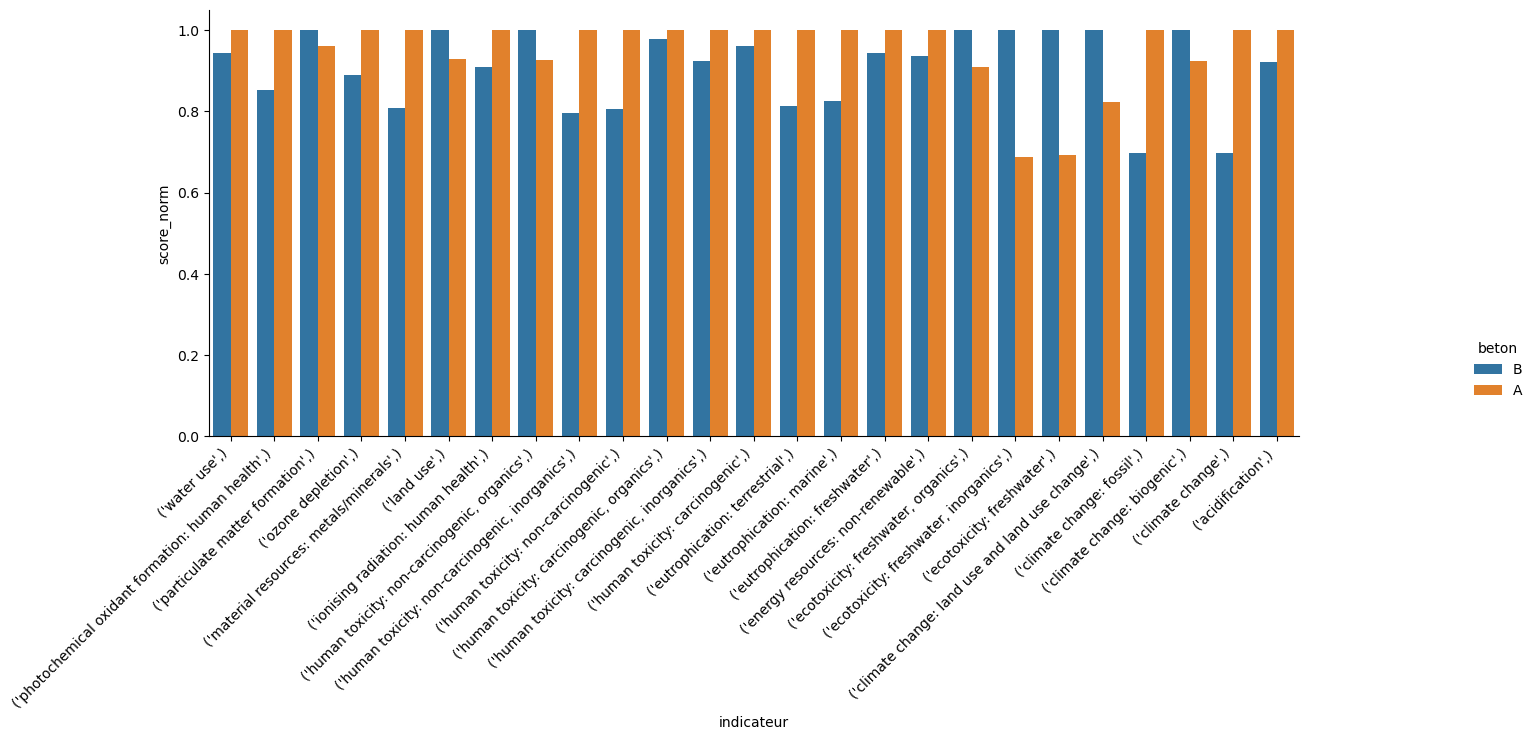

In [39]:
# fig, ax = plt.subplots(figsize=(10,5))
g=sns.catplot(data=res,x='indicateur',y='score_norm',kind='bar',hue='beton',errorbar=None)
g.fig.set_size_inches(20, 5);
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right');

#### Exercice

Sauriez-vous refaire cette comparaison avec une autre méthode d'impact ? Par exemple ReCiPe v1.03.